<a href="https://colab.research.google.com/github/rfadhila07/Test-result/blob/main/TA_NewScenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect your Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf
import cv2
import io
from skimage.filters import gaussian
from skimage import exposure
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization
from tensorflow.keras.layers import Add, GlobalAveragePooling2D
from skimage import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop, Adamax, Nadam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator

import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import csv
import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input, Conv2D, MaxPooling2D
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image
# from keras_retinanet import layers
import keras.backend as k
# import keras_retinanet

In [3]:
fold_num=1 #Select Fold Number

In [4]:
#Here we set the data generators for applying data augmentation methods
train_datagen = ImageDataGenerator()#horizontal_flip=True,vertical_flip=True,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator()
train_df =pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/train{}.csv'.format(fold_num)) #raed train csv file
validation_df = pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/validation{}.csv'.format(fold_num)) #raed validation csv file (Validation in the training process)
train_df = shuffle(train_df) #Shuffle the train data
test_df = pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/test{}.csv'.format(fold_num))#raed test csv file (For evaluating the final version of th

In [5]:
# generating one row 
train_df = train_df.sample(n =1900, random_state=1)
    
# display
train_df

,filename,class
603,137covid_patient9_SR_2_IM00037.tif,covid
2814,normal1_patient180_SR_2_IM00025.tif,normal
3603,normal5_patient168_SR_2_IM00040.tif,normal
3277,normal4_patient176_SR_2_IM00011.tif,normal
2928,normal1_patient184_SR_2_IM00034.tif,normal
...,...,...
2121,cdunnormal_patient156_SR_2_IM00015.tif,normal
2801,normal1_patient180_SR_2_IM00012.tif,normal
611,157covid_patient124_SR_2_IM00024.tif,covid
1788,157covid_patient140_SR_4_IM00026.tif,covid


In [6]:
train_df.groupby('class').count()

,filename
class,
covid,903
normal,997


In [7]:
# generating one row
validation_df = validation_df.sample(n = 475, random_state = 1)
    
# display
validation_df

,filename,class
191,137covid_patient105_SR_3_IM00020.tif,covid
832,normal2_patient314_SR_2_IM00033.tif,normal
111,137covid_patient120_SR_2_IM00022.tif,covid
262,137covid_patient120_SR_3_IM00025.tif,covid
670,normal5_patient226_SR_2_IM00024.tif,normal
...,...,...
865,normalcd1_patient412_SR_2_IM00032.tif,normal
304,137covid_patient18_SR_3_IM00013.tif,covid
200,137covid_patient10_SR_3_IM00016.tif,covid
394,137covid_patient118_SR_4_IM00010.tif,covid


In [8]:
validation_df.groupby('class').count()

,filename
class,
covid,244
normal,231


In [9]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [10]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
6944,normal5_patient387_SR_2_IM00012.tif,normal
1612,normal1_patient234_SR_2_IM00022.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5315,normal4_patient214_SR_2_IM00011.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6436,normal4_patient374_SR_2_IM00024.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [11]:
test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [12]:
cd /content/drive/MyDrive/CLAHEonly/Test/

/content/drive/MyDrive/CLAHEonly/Test


In [13]:
shape=(224,224,3) #shape of the dataset images (in TIFF format)

In [14]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_df,
      directory='/content/drive/MyDrive/CLAHEonly/Test/',
      x_col="filename",
      y_col="class",
      target_size=shape[:2],
      batch_size=32,
      class_mode='categorical',color_mode="rgb",shuffle=True)
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='/content/drive/MyDrive/CLAHEonly/Test/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='/content/drive/MyDrive/CLAHEonly/Test/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 475 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [15]:
data = []
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/CLAHEonly/Test/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data.append(img)

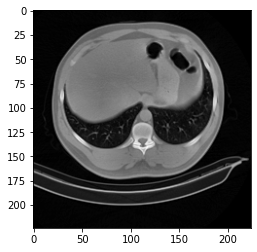

In [16]:
plt.imshow(data[5])

In [17]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

In [18]:
data2 = []
for num,img_name in enumerate(test_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/CLAHEonly/Test/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data2.append(img)

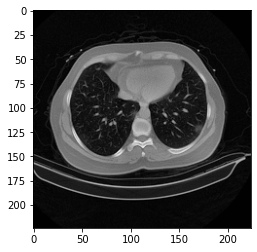

In [19]:
plt.imshow(data2[1])

In [20]:
data2 = np.array(data2)
data2.shape

(200, 224, 224, 3)

In [21]:
valX, valY = np.array(data2), np.array(validation_generator.classes)
trainX, trainY = np.array(data), np.array(train_generator.classes)

In [22]:
from sklearn.model_selection import train_test_split
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(train_generator.classes), test_size=0.25)
#trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
#testY = np.asarray(testY).astype('float32').reshape((-1,1))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1425, 224, 224, 3)
(475, 224, 224, 3)
(1425,)
(475,)


In [23]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

from keras.applications.efficientnet import EfficientNetB0
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.applications.resnet import ResNet50
import tensorflow as tf

In [24]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
out = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_EfficientNetB0.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [26]:

from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [27]:
from keras.optimizers import Adam, SGD, RMSprop, Adamax

# train the model using the Adamax optimizer
print("[INFO] training network...")
opt = Adamax(learning_rate=0.01,decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es,checkpoint])

[INFO] training network...
Epoch 1/50
45/45 [==============================] - 18s 38ms/step - loss: 31.4910 - accuracy: 0.4780 - val_loss: 2.3680 - val_accuracy: 0.5032

Epoch 00001: val_accuracy improved from -inf to 0.50316, saving model to best_weight_EfficientNetB0.h5
Epoch 2/50
45/45 [==============================] - 1s 25ms/step - loss: 1.4577 - accuracy: 0.6365 - val_loss: 0.4782 - val_accuracy: 0.7811

Epoch 00002: val_accuracy improved from 0.50316 to 0.78105, saving model to best_weight_EfficientNetB0.h5
Epoch 3/50
45/45 [==============================] - 1s 25ms/step - loss: 0.4397 - accuracy: 0.8025 - val_loss: 0.5373 - val_accuracy: 0.7305

Epoch 00003: val_accuracy did not improve from 0.78105
Epoch 4/50
45/45 [==============================] - 1s 24ms/step - loss: 0.6801 - accuracy: 0.6984 - val_loss: 0.3737 - val_accuracy: 0.8421

Epoch 00004: val_accuracy improved from 0.78105 to 0.84211, saving model to best_weight_EfficientNetB0.h5
Epoch 5/50
45/45 [===============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


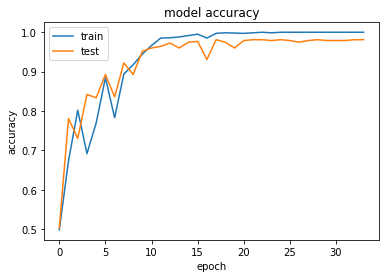

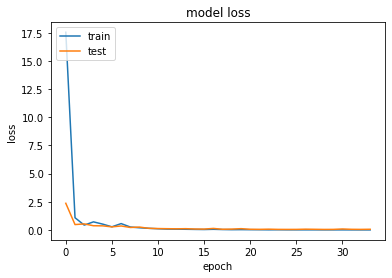

In [28]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.97      0.99      0.98       219
      normal       0.99      0.98      0.98       256

    accuracy                           0.98       475
   macro avg       0.98      0.98      0.98       475
weighted avg       0.98      0.98      0.98       475



In [30]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[216   3]
 [  6 250]]


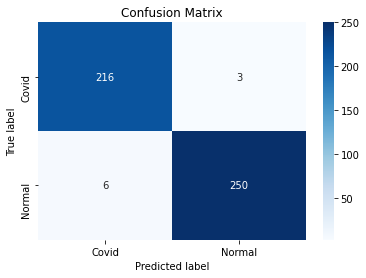

In [31]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [32]:

valX, valY = np.array(data2), np.array(test_generator.classes)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = test_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.48      0.60      0.54        93
      normal       0.56      0.44      0.49       107

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



In [34]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[56 37]
 [60 47]]


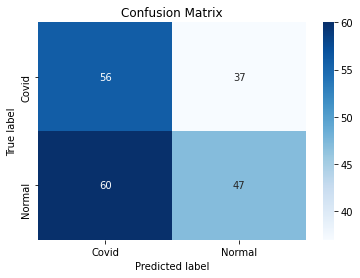

In [35]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [36]:
print("Evaluate on test data")
results = model.evaluate(valX, valY, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 0s 11ms/step - loss: 1.9482 - accuracy: 0.5150
test loss, test acc: [1.9481674432754517, 0.5149999856948853]
